# GLOBAL BURDEN OF THE RISK FACTORS OF TUBERCULOSIS: A 
# SELECTIVE REVIEW OF THE GLOBAL TUBERCULOSIS REPORT 2022.

## 1 AIMS, OBJECTIVES, AND BACKGROUND

## 1.1 INTRODUCTION

 Tuberculosis (TB) is a respiratory disease caused by the bacterium Mycobacterium tuberculosis. Before the COVID-19 pandemic, TB ranked high above HIV/AIDS as the world’s leading cause of death from a lone infectious agent [1]. Over the years, efforts have been made globally to reduce the incidence of the disease, however it is necessary that its risk factors be considered in these efforts to further reduce the global incidence and burden of the disease. Some of these risk factors include: alcohol, smoking, undernutrition, diabetes, and HIV [2].
 In this project, I analyze openly available global data obtained from the World Health Organization (WHO) website on the burden of the five (5) most important risk factors for TB. As a previous sufferer of the disease who got infected despite being vaccinated against the infection, I am seeking to understand some of the factors that may have been behind why I suffered the disease as well as visually represent the hierarchy of their burden. 
 The report by the WHO on the risk factors of the disease show the burden but not in a hierachical format. Thus in my project I delve into showing the hierarchy of burden each othe risk factors glaobally. The visual representations of the analysed data can show a lay person but more importantly, health policy makers, which risk factor should be tackled first and more to achieve a world free of tuberculosis sooner.

## 1.2 AIMS AND OBJECTIVES

## 1.2.1 AIMS
Access public-accessible global data on the global burden of tuberculosis available on the WHO website.
Sort through the data to find specifics on the risk factors of the disease. 
Web scrape the data and store this data in a format that enables for data cleaning and analysis.
Clean up and modify the data so that it can be tailored to the specifics needed for the analysis.
Perform data analysis to find the patterns of the risk factors.

## 1.2.2 OBJECTIVES

Some of the questions I want to answer in this project include:
1) What are the major risk factors of tuberculosis globally?
2) What is the current highest value of each risk factor?
3) What is the hierarchy of the burden of these risk factors?
4) Which risk factor poses the highest burden globally?

## 1.3. DATA

## 1.3.1 CHOICE OF DATA SOURCE
Since 1997, the WHO has released an annual worldwide tuberculosis (TB) report. The paper offers a thorough and current analysis of the TB epidemic as well as developments in the disease's detection, diagnosis, and treatment at the international, regional, and national levels. 
The data used in this report is the 2022 report and it is openly available to the public through the app, website and the Github repository for WHO.

## 1.3.2 RELIABILITY OF DATA
The data published by the WHO as The Global Tuberculosis Report 2022 were collected and processed by a team of workers across the globe headed by the Director for the Global TB Program. The entire data came from a total of 215 countries clustered into 6 regions namely; WHO African region, WHO region of the Americas, WHO South-East Asia region, WHO European region, WHO Eastern Mediterranean region, and WHO Western Pacific region.[1]
The data for the HIV burden on TB as published on The Global Tuberculosis Report 2022  was obtained from the United Nations Programme on HIV/AIDS (UNAIDS).[1]
Both sources are internationally reputable data sources, thus reliable.

## 1.3.3 DATA FORMATS AVAILABLE
The WHO provides its openly available data in machine readable datasets. The formats are charts and tables. There are options for downloading the files in comma separated value (csv) formats either directly from their website or from their Github repository. Other data formats that could be used include JSON but the website provided the data in csv format it makes complete sense to use the data in that format instead of converting.

## 1.3.4 LIMITATIONS OF DATA

One major limitation of this data is that some values were missing in some rows. This could have been the result of the data collection process and there is no way to ascertain if and how those missing values would impact the results of the analysis or if it introduces a bias in the data.
A second limitation is the fact that the data is from only one source, WHO and therefore the results are not compared to any other findings from different researchers.

## 1.4 ETHICAL CONSIDERATIONS
The data used for the analysis are obtained within the terms of data usage permitted by the WHO. In their terms of data use page they state clearly thus, “The World Health Organization (“WHO”) encourages the public to access and use the data that it collects and publishes on its website www.who.int.” [3]
Other considerations with regards to data use in this project include proper acknowledgement of data source which is done both in-text and in the reference list. Alteration to the dataset in the data cleaning process did not involve mutilation or replacement of any figures provided by the WHO. To clean up the data, only columns irrelevant to the aims and objectives  and redundant in nature were removed, to allow for a cleaner data and for a streamlined analysis. 
There were no restrictions spelled out in the WHO's terms and conditions of data usage about web scraping their website for data. 







## 2 WEB SCRAPING

## 2.1 DATA EXTRACTION METHODOLOGY

Two methods are used in extracting data in this project: web scraping and csv file.
In the web scraping, the request library is used to get the html table of the data from the Github repository of the WHO.
A separate csv file containing the same data was also downloaded and read using the panda library

In [2]:
#Importing all libraries and modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import matplotlib as plt
import seaborn as sns

## 2.1.1 WEB SCRAPED DATA
Below are the functions used to scrape the data from the web and put it into a data frame

In [3]:
# Get the HTML content from the Github website link
response = requests.get("https://github.com/GTB-TME/gtbreport2022/blob/main/csv/db/db_inc_risk_factor_country_2022-11-08.csv")
html = response.text

# Use BeautifulSoup to Parse the HTML content
soup = BeautifulSoup(html, "html.parser")

#  From the HTML content find the table element
table = soup.find("table")

# Initialize an empty list to store the table data
data = []

# Loop through each row in the table
for row in table.find_all("tr"):
    # Initialize an empty list to store the row data
    row_data = []
    # Loop through each cell in the row  and use ["td", "th"] to get both data and header cells
    for cell in row.find_all(["td", "th"]): 
        # Get the text content of the cell and strip any whitespace
        text = cell.text.strip()
        # Append the text to the row data list
        row_data.append(text)
    # Append the row data list to the table data list
    data.append(row_data)

# Import pandas
import pandas as pd

# Convert the output to a pandas dataframe
df = pd.DataFrame(data[1:], columns=data[0])

# Print the dataframe
print(df)

        iso3  year     risk.factor measure unit sex  age  best    lo     hi
0        AFG  2021             hiv     inc  num   a    a   385     8   1457
1        AFG  2021        diabetes     inc  num   a  18+  3970   649  10234
2        AFG  2021        diabetes     inc  num   f  18+  2112   434   5090
3        AFG  2021        diabetes     inc  num   m  18+  1854   362   4542
4        AFG  2021         alcohol     inc  num   a  15+   655    82   1808
...  ..  ...   ...             ...     ...  ...  ..  ...   ...   ...    ...
2116     ZWE  2021         alcohol     inc  num   m  15+  3500  1180   7057
2117     ZWE  2021         smoking     inc  num   a  15+  1721   201   4837
2118     ZWE  2021         smoking     inc  num   f  15+    63    13    151
2119     ZWE  2021         smoking     inc  num   m  15+  1794   409   4183
2120     ZWE  2021  undernutrition     inc  num   a    a                   

[2121 rows x 11 columns]


## 2.1.2 CSV DATA
Below are the functions used to read the data from the downloaded csv file and put it into a data frame

In [4]:
# using padas to read the csv file 
df = pd.read_csv("tb-riskfactors.csv")
print(df)

     iso3  year     risk.factor measure unit sex  age    best      lo       hi
0     AFG  2021             hiv     inc  num   a    a   385.0     8.0   1457.0
1     AFG  2021        diabetes     inc  num   a  18+  3970.0   649.0  10234.0
2     AFG  2021        diabetes     inc  num   f  18+  2112.0   434.0   5090.0
3     AFG  2021        diabetes     inc  num   m  18+  1854.0   362.0   4542.0
4     AFG  2021         alcohol     inc  num   a  15+   655.0    82.0   1808.0
...   ...   ...             ...     ...  ...  ..  ...     ...     ...      ...
2116  ZWE  2021         alcohol     inc  num   m  15+  3500.0  1180.0   7057.0
2117  ZWE  2021         smoking     inc  num   a  15+  1721.0   201.0   4837.0
2118  ZWE  2021         smoking     inc  num   f  15+    63.0    13.0    151.0
2119  ZWE  2021         smoking     inc  num   m  15+  1794.0   409.0   4183.0
2120  ZWE  2021  undernutrition     inc  num   a    a     NaN     NaN      NaN

[2121 rows x 10 columns]


## 3 DATA CLEANING AND PROCESSING

The two cleaning processes applied to the data include:
1) Removing columns that have redundant values which are the columns with "measure", "unit", and "age" headers respectively.
2) Removing columns that contain NaN values.
The redundant columns are removed to streamline the data while NAN values are removed to ensure that we do not have errors in the analysis. 

In [5]:
# Removing columns with redundant values
dp = df.drop(columns = ['measure', 'unit', 'age'])
print(dp)

     iso3  year     risk.factor sex    best      lo       hi
0     AFG  2021             hiv   a   385.0     8.0   1457.0
1     AFG  2021        diabetes   a  3970.0   649.0  10234.0
2     AFG  2021        diabetes   f  2112.0   434.0   5090.0
3     AFG  2021        diabetes   m  1854.0   362.0   4542.0
4     AFG  2021         alcohol   a   655.0    82.0   1808.0
...   ...   ...             ...  ..     ...     ...      ...
2116  ZWE  2021         alcohol   m  3500.0  1180.0   7057.0
2117  ZWE  2021         smoking   a  1721.0   201.0   4837.0
2118  ZWE  2021         smoking   f    63.0    13.0    151.0
2119  ZWE  2021         smoking   m  1794.0   409.0   4183.0
2120  ZWE  2021  undernutrition   a     NaN     NaN      NaN

[2121 rows x 7 columns]


In [13]:
# cleaning out rows with NAN values
df = pd.DataFrame({'A': [1, 2, None], 'B': [4, None, 6], 'C': [None, None, None]})
df = dp.dropna()

print(df)

# Notice that our rows reduce from 2121 to 1935 rows

     iso3  year risk.factor sex    best      lo       hi
0     AFG  2021         hiv   a   385.0     8.0   1457.0
1     AFG  2021    diabetes   a  3970.0   649.0  10234.0
2     AFG  2021    diabetes   f  2112.0   434.0   5090.0
3     AFG  2021    diabetes   m  1854.0   362.0   4542.0
4     AFG  2021     alcohol   a   655.0    82.0   1808.0
...   ...   ...         ...  ..     ...     ...      ...
2115  ZWE  2021     alcohol   f   552.0   167.0   1164.0
2116  ZWE  2021     alcohol   m  3500.0  1180.0   7057.0
2117  ZWE  2021     smoking   a  1721.0   201.0   4837.0
2118  ZWE  2021     smoking   f    63.0    13.0    151.0
2119  ZWE  2021     smoking   m  1794.0   409.0   4183.0

[1935 rows x 7 columns]


## 4.0  DATA ANALYSIS

In the data analysis we anwer the research questions raised in our objectives which are:
1) What are the major risk factors of tuberculosis globally?
2) What is the current highest prevalence value of each risk factor?
3) What is the hierarchy of the burden of these risk factors?
4) Which risk factor poses the highest burden globally?

## 4.1 Major risk factors of tuberculosis globally

To answer the first research question I count the number of risk factors by plotting them as values against the number of
 times they appear on the table

<Axes: >

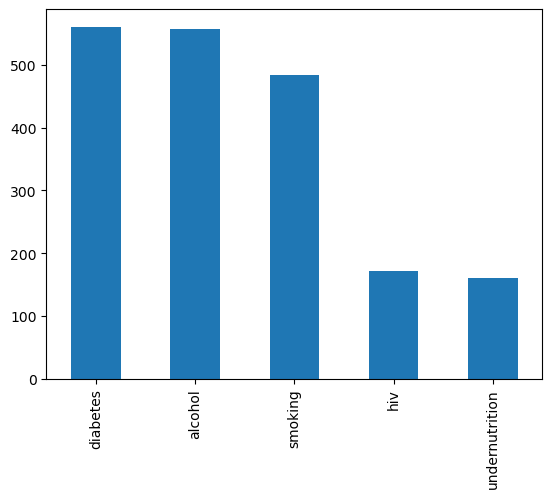

In [17]:
# The count() function in pandas and plot() function from matplotlib are used below

variable_counts = df['risk.factor'].value_counts()
variable_counts.plot(kind='bar')

# our chart shows us that we have five major risk factors for TB; Diabetes, alcohol, smoking, hiv, and undernutrition.

## 4.2 Highest prevalence value of each risk factor

To assess the highest prevalence of each risk factor we filter through the dataframe to include rows where only one of each riak factor is contained at a time and sum the equivalent pravlence value on the 'hi' column

In [15]:
# Filter the DataFrame to only include rows where the 'risk.factor' column contains 'diabetes'
diabetes_df = df[df['risk.factor'] == 'diabetes']

# Sum the values in the 'hi' column of the filtered DataFrame
total = diabetes_df['hi'].sum()
print(total)

1659818.0


In [16]:
#  Filter the DataFrame to only include rows where the 'risk.factor' column contains 'alcohol'
alcohol_df = df[df['risk.factor'] == 'alcohol']

# Sum the values in the 'hi' column of the filtered DataFrame
total = diabetes_df['hi'].sum()
print(total)

3360123.0


In [19]:
# Filter the DataFrame to only include rows where the 'risk.factor' column contains 'smoking'
smoking_df = df[df['risk.factor'] == 'smoking']

# Sum the values in the 'hi' column of the filtered DataFrame
total = diabetes_df['hi'].sum()
print(total)

3344007.0


In [20]:
# Filter the DataFrame to only include rows where the 'risk.factor' column contains 'hiv'

hiv_df = df[df['risk.factor'] == 'hiv']

# Sum the values in the 'hi' column of the filtered DataFrame
total = diabetes_df['hi'].sum()
print(total)

1661710.0


In [21]:
#  Filter the DataFrame to only include rows where the 'risk.factor' column contains 'undernutrition4q'
undernutrition_df = df[df['risk.factor'] == 'undernutrition']

# Sum the values in the 'hi' column of the filtered DataFrame
total = diabetes_df['hi'].sum()
print(total)

2812370.0


## 4.3 The hierarchy of the burden of these risk factors

To show the hierarchy of the burden the risk facors, a bar chart showing the five risk factors plotted against the sum of their prevalence as indicated in the "hi" column is shown below

<Axes: xlabel='risk.factor'>

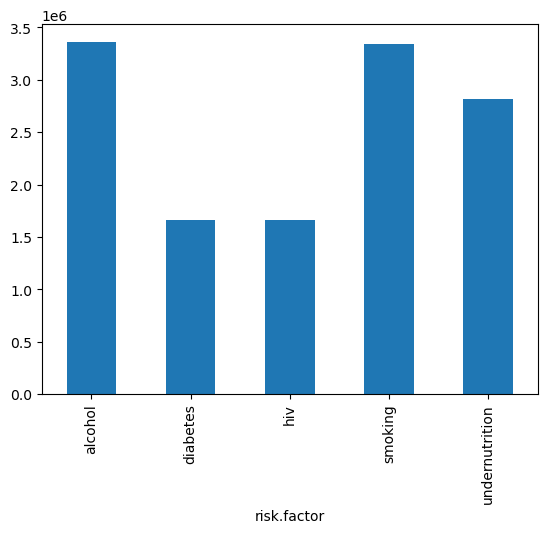

In [33]:
# Here we use the groupby() function in panda and the plot() function in the matplotlib libraries repectively
grouped_df = df.groupby('risk.factor')['hi'].sum()

# Plot the grouped data in a bar chart
grouped_df.plot(kind='bar')




## 4.4  The risk factor that poses the highest burden globally

A line plot representation shows clearly the risk factor with the highest prevalence. To create this plot we use the seaborn library

<Axes: xlabel='Risk Factor', ylabel='Frequency'>

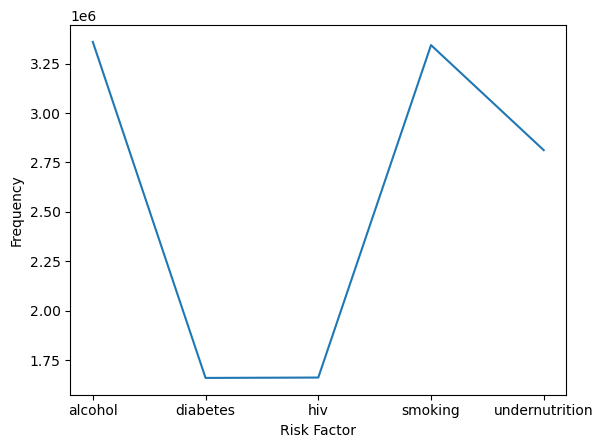

In [31]:
# Group the DataFrame by the 'risk.factor' column and sum the values in the 'hi' column
grouped_df = df.groupby('risk.factor')['hi'].sum()

# Convert the grouped data into a DataFrame
df2 = pd.DataFrame({'Risk Factor': grouped_df.index, 'Frequency': grouped_df.values})

# Plot the data in a line box plot using Seaborn
sns.lineplot(x='Risk Factor', y='Frequency', data=df2)



## 5.0 SUMMARY AND CONCLUSION

It is clear from our data analysis that the risk factors for tuberculosis with the highest prevalence are smoking and alcohol. Interestingly both are lifestyle habits that can be modified with the right kind of support. Therefore in the efforts made to bring the world to zero incidence of tuberculosis, a huge chunk of the campaigns should be targeted at alcohol consumption and smoking especially in countries where undernutrition is a problem.

## REFERENCES

1) World Health Organization (2022). Global tuberculosis report 2022  Available at: https://www.who.int/teams/global-tuberculosis-programme/tb-reports/global-tuberculosis-report-2022 (Accessed: 27 June 2023). 

2) Silva, D. R., Muñoz-Torrico, M., Duarte, R., Galvão, T., Bonini, E. H., Arbex, F. F., ... & Mello, F. C. D. Q. (2018). Risk factors for tuberculosis: diabetes, smoking, alcohol use, and the use of other drugs. Jornal Brasileiro de Pneumologia, 44, 145-152.

3) World Health Organization (2023). Terms and conditions of use for WHO data compilations, aggregations, evaluations and analyses. Available at: https://www.who.int/about/policies/publishing/data-policy/terms-and-conditions (Accessed: 28 June 2023)
